In [36]:
import pandas as pd
 
deportistas = {
    'nombre':['Rafa Nadal', 'Pau Gasol', 'Fernando Alonso', 'Marc Marquez', 'Sergio Llul', 'Jon Rahm', 'Carolina Marin',
              'Sandra Sanchez', 'Jon Rahm', 'Rafa Nadal' ],
    'edad':[None, 42, None, 30, 37, 31, None, 29, 31, None],
    'popularidad':[9.5, None, 8.7, 7.9, None, 8.4, 7.5, 7.0, 8.4, 9.5],
    'deporte':['tenis', 'baloncesto', 'formula 1', 'motociclismo', 'baloncesto', 'golf', 'badminton', 'karate', 'golf', 'tenis']
}
 
dfdeportes = pd.DataFrame(deportistas)
 
dfdeportes

,nombre,edad,popularidad,deporte
0,Rafa Nadal,NaN,9.5,tenis
1,Pau Gasol,42.0,NaN,baloncesto
2,Fernando Alonso,NaN,8.7,formula 1
3,Marc Marquez,30.0,7.9,motociclismo
4,Sergio Llul,37.0,NaN,baloncesto
5,Jon Rahm,31.0,8.4,golf
6,Carolina Marin,NaN,7.5,badminton
7,Sandra Sanchez,29.0,7.0,karate
8,Jon Rahm,31.0,8.4,golf
9,Rafa Nadal,NaN,9.5,tenis


In [37]:
dfdeportes.isnull().sum()

nombre         0
edad           4
popularidad    2
deporte        0
dtype: int64

In [38]:
df2 = dfdeportes.copy()

df2['edad_IMP'] = df2['edad'].fillna(0)
df2

,nombre,edad,popularidad,deporte,edad_IMP
0,Rafa Nadal,NaN,9.5,tenis,0.0
1,Pau Gasol,42.0,NaN,baloncesto,42.0
2,Fernando Alonso,NaN,8.7,formula 1,0.0
3,Marc Marquez,30.0,7.9,motociclismo,30.0
4,Sergio Llul,37.0,NaN,baloncesto,37.0
5,Jon Rahm,31.0,8.4,golf,31.0
6,Carolina Marin,NaN,7.5,badminton,0.0
7,Sandra Sanchez,29.0,7.0,karate,29.0
8,Jon Rahm,31.0,8.4,golf,31.0
9,Rafa Nadal,NaN,9.5,tenis,0.0


In [51]:
'''Ejercicio 3.11.1.
Dado el CSV, indicadores.csv, compartido por el tutor en este foro, crea un dataframe e indica cuántos elementos nulos tiene cada una de las variables que lo componen.'''

import pandas as pd

path = r'/Users/okashi/Desktop/indicadores.csv'

data = pd.read_csv(path,sep=';')
df = pd.DataFrame(data)

null = df.isnull().sum()
null

Código municipio      0
Municipio             0
Anno2016              0
Anno2015              0
Anno2014              0
Anno2013              9
Anno2011             16
Anno2010             22
Anno2006             21
Anno2001            127
Anno1996            131
dtype: int64

In [54]:
'''Ejercicio 3.11.3.
Del dataframe creado en el ejercicio 3.11.1, rechaza las variables correspondientes a los años 1996 y 2001'''

import pandas as pd

path = r'/Users/okashi/Desktop/indicadores.csv'

data = pd.read_csv(path,sep=';')
df = pd.DataFrame(data)

df2 = df.copy()
df2['Anno2001'] = df2.Anno2001.fillna(0)
df2['Anno1996'] = df2.Anno1996.fillna(0)

df2['Anno2001_copy'] = df2.Anno2001.apply(lambda x:0 if x==0 else 1)
df2['Anno1996_copy'] = df2.Anno1996.apply(lambda x:0 if x==0 else 1)

df2.drop(columns=['Anno2001','Anno1996'], inplace=True)
df2

,Código municipio,Municipio,Anno2016,Anno2015,Anno2014,Anno2013,Anno2011,Anno2010,Anno2006,Anno2001_copy,Anno1996_copy
0,48001,Abadiño,59.42,58.78,58.47,57.59,57.13,56.11,43.26,1,0
1,20001,Abaltzisketa,50.18,50.18,48.75,49.10,NaN,43.53,31.03,1,1
2,48002,Abanto y Ciérvana-Abanto Zierbena,61.09,60.05,59.47,58.27,57.36,55.96,44.64,1,1
3,20002,Aduna,62.89,62.11,60.10,59.90,58.99,53.21,NaN,1,0
4,20016,Aia,56.58,55.75,55.68,NaN,52.34,51.44,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...
246,48915,Ziortza-Bolibar,59.41,58.01,56.87,54.89,53.53,52.60,38.62,0,0
247,20028,Zizurkil,53.67,53.61,52.68,51.90,50.04,47.92,NaN,1,1
248,1063,Zuia,71.63,70.98,70.75,70.13,68.87,67.42,NaN,1,1
249,20081,Zumaia,65.18,64.22,63.27,63.03,62.41,60.71,49.79,1,1


In [63]:
'''Ejercicio 3.11.4.
Elimina, de la variable que correspondiente al año 2013, los registros que contienen valores nulos y comprueba que se han eliminado correctamente'''

df2= df2[(~df2.Anno2013.isnull())]
df2.Anno2013.isnull().sum()

0

In [58]:
'''Ejercicio 3.11.5.
Rellena los valores nulos de las variables que aún los tengan, con la media del resto de valores de esas variables.'''

df2 = df2.fillna(df2.mean(numeric_only = True))
df2.isnull().sum()

Código municipio    0
Municipio           0
Anno2016            0
Anno2015            0
Anno2014            0
Anno2013            0
Anno2011            0
Anno2010            0
Anno2006            0
Anno2001_copy       0
Anno1996_copy       0
dtype: int64

In [59]:
df2

,Código municipio,Municipio,Anno2016,Anno2015,Anno2014,Anno2013,Anno2011,Anno2010,Anno2006,Anno2001_copy,Anno1996_copy
0,48001,Abadiño,59.42,58.78,58.47,57.59,57.130000,56.11,43.260000,1,0
1,20001,Abaltzisketa,50.18,50.18,48.75,49.10,61.988274,43.53,31.030000,1,1
2,48002,Abanto y Ciérvana-Abanto Zierbena,61.09,60.05,59.47,58.27,57.360000,55.96,44.640000,1,1
3,20002,Aduna,62.89,62.11,60.10,59.90,58.990000,53.21,49.227072,1,0
5,20003,Aizarnazabal,51.51,50.40,50.40,49.92,49.920000,46.39,49.227072,1,1
...,...,...,...,...,...,...,...,...,...,...,...
245,1018,Zigoitia,72.19,71.05,70.43,70.74,69.660000,68.42,56.520000,0,1
246,48915,Ziortza-Bolibar,59.41,58.01,56.87,54.89,53.530000,52.60,38.620000,0,0
247,20028,Zizurkil,53.67,53.61,52.68,51.90,50.040000,47.92,49.227072,1,1
248,1063,Zuia,71.63,70.98,70.75,70.13,68.870000,67.42,49.227072,1,1


<AxesSubplot:>

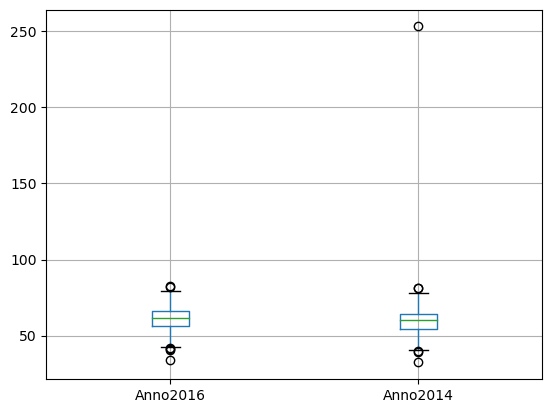

In [62]:
'''Ejercicio 3.11.6.
Detecta si hay outliers en las columnas correspondientes a los años 2016 y 2014 con un diagrama de caja.'''

import matplotlib.pyplot as plt

df2[['Anno2016','Anno2014']].boxplot()



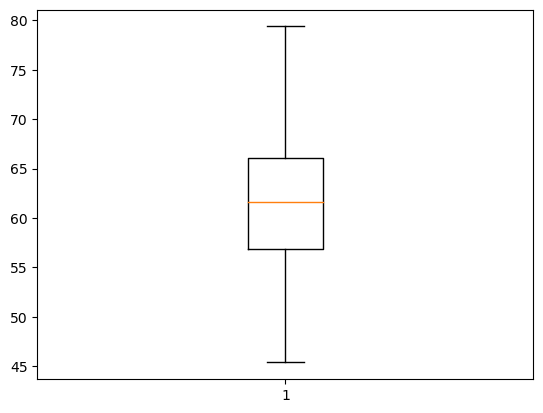

In [73]:
'''Ejercicio 3.11.7.
Detecta si hay outliers en las mismas columnas que en el ejercicio 3.11.6, pero esta vez con el rango intercuartílico, eliminando las filas correspondientes en el caso en que los haya. 
Comprueba con el diagrama de cajas si ahora no hay outliers.'''

import numpy as np

q1= np.quantile(df2['Anno2016'],0.25)
q3= np.quantile(df2['Anno2016'],0.75)
iqr = q3-q1

limit_inf = q1-1.5*iqr
limit_sup = q3+1.5*iqr

df2.drop(df2[df2.Anno2016 < limit_inf].index, inplace = True)
df2.drop(df2[df2.Anno2016 > limit_sup].index, inplace = True)

plt.boxplot(df2['Anno2016'])
plt.show()



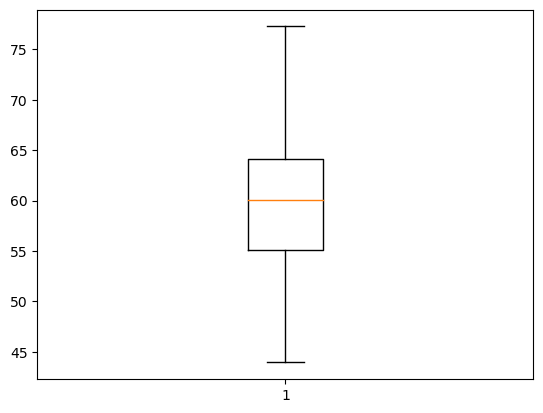

In [74]:
q1= np.quantile(df2['Anno2014'],0.25)
q3= np.quantile(df2['Anno2014'],0.75)
iqr = q3-q1

limit_inf = q1-1.5*iqr
limit_sup = q3+1.5*iqr

df2.drop(df2[df2.Anno2014 < limit_inf].index, inplace = True)
df2.drop(df2[df2.Anno2014 > limit_sup].index, inplace = True)

plt.boxplot(df2['Anno2014'])
plt.show()
